# Solution: Exercise 1

The model does not extrapolate well because for larger values of time the exponential term will matter more, and it was not included in our model.

# Solution: Exercise 2

Below code is modified from the original notebook to use the different value of $H = [t, t^2, t^3]$.

# Linear Least Squares (Batch)

From Crassidis & Junkins Section 1.2.1

In [15]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)

In [16]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

import requests
url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
r = requests.get(url)

# Store the file to the colab working directory
with open('plot_utility.py', 'w') as f:
    f.write(r.text)

# import the function we want from that file
from plot_utility import plot_tme

# Generate sample time series data

Our time series is given by:

$
y(t) = t + \sin(t) + 2\cos(2t) - 0.4 \cdot 10^{-4} e^t
$

To separate out the parameters we can rewrite this as:

$
y = H \mathbf{x} =
\begin{bmatrix}
t & \sin(t) & \cos(2t) & e^{t}
\end{bmatrix}
\begin{bmatrix}
1 \\
1 \\
2 \\
-0.4\cdot10^{-4}
\end{bmatrix}
$

In [17]:
t = np.linspace(0, 6, 500)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Add some normal (gaussian) noise

In [18]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.5

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T

In [19]:
y_tilde = y+v

# Plotting

<Axes: xlabel='Time', ylabel='y'>

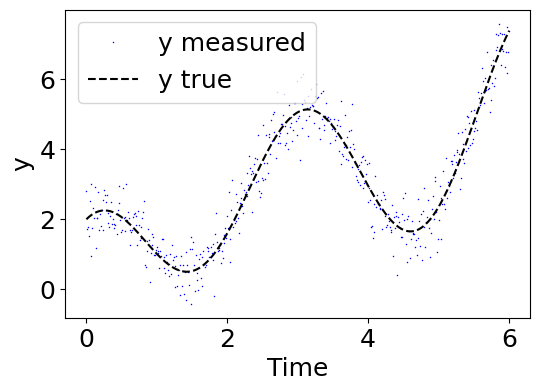

In [20]:
plot_tme(t, y, y_tilde)

# Candidate model

Consider this model:

$
H =
\begin{bmatrix}
t & t^2 & t^3
\end{bmatrix}
$

Find the parameters $\mathbf{x}$ for $y=H\mathbf{x}$

In [21]:
model_1_H = np.vstack([t, t**2, t**3]).T

In [22]:
model_1_H

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20240481e-02, 1.44577733e-04, 1.73840961e-06],
       [2.40480962e-02, 5.78310930e-04, 1.39072769e-05],
       ...,
       [5.97595190e+00, 3.57120012e+01, 2.13413201e+02],
       [5.98797595e+00, 3.58558560e+01, 2.14704003e+02],
       [6.00000000e+00, 3.60000000e+01, 2.16000000e+02]])

# Linear Least Squares

$\mathbf{\hat{x}}=(H^{\top}H)^{-1}H^{\top}\mathbf{\tilde{y}}$

### Model 1

In [23]:
x_1_hat = np.linalg.inv(model_1_H.T@model_1_H)@model_1_H.T@y_tilde
print(x_1_hat)

[[ 2.60976414]
 [-0.80239328]
 [ 0.08688453]]


<Axes: xlabel='Time', ylabel='y'>

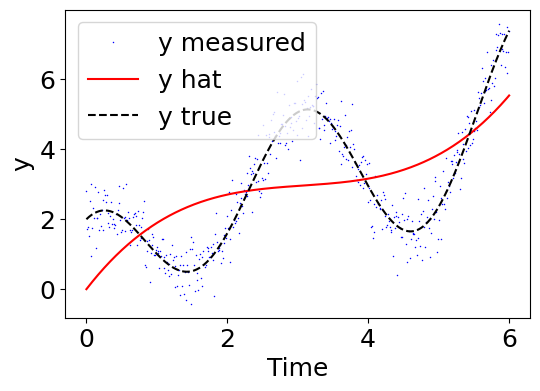

In [24]:
y_1_hat = model_1_H@x_1_hat
plot_tme(t, y, y_tilde, y_1_hat)